In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from FANGS import * #import tools from FANGS library


In [2]:
!ls

Example -  End Point Results.xlsx
Example -  Melt Curve Derivative Results.xlsx
Example -  Quantification Amplification Results.xlsx
Example_FANGS_analysis_notebook.ipynb
Example_Primers_96.xlsx
Example_pooling_file.csv
Example_primer_transfer_notebook.ipynb
example_primer_transfer.csv


### Input files from qPCR instrument

In [3]:
File_Path = "" #input file path if files are in another folder
End_file = "Example -  End Point Results.xlsx" 
Melt_file = "Example -  Melt Curve Derivative Results.xlsx"
Quant_file = "Example -  Quantification Amplification Results.xlsx"

In [ ]:
Pooling_output_file = "Example_pooling_file.csv" #give the output file a unique name

### The Analysis tool can be used to graph melting curves, quant curves, and end RFU.


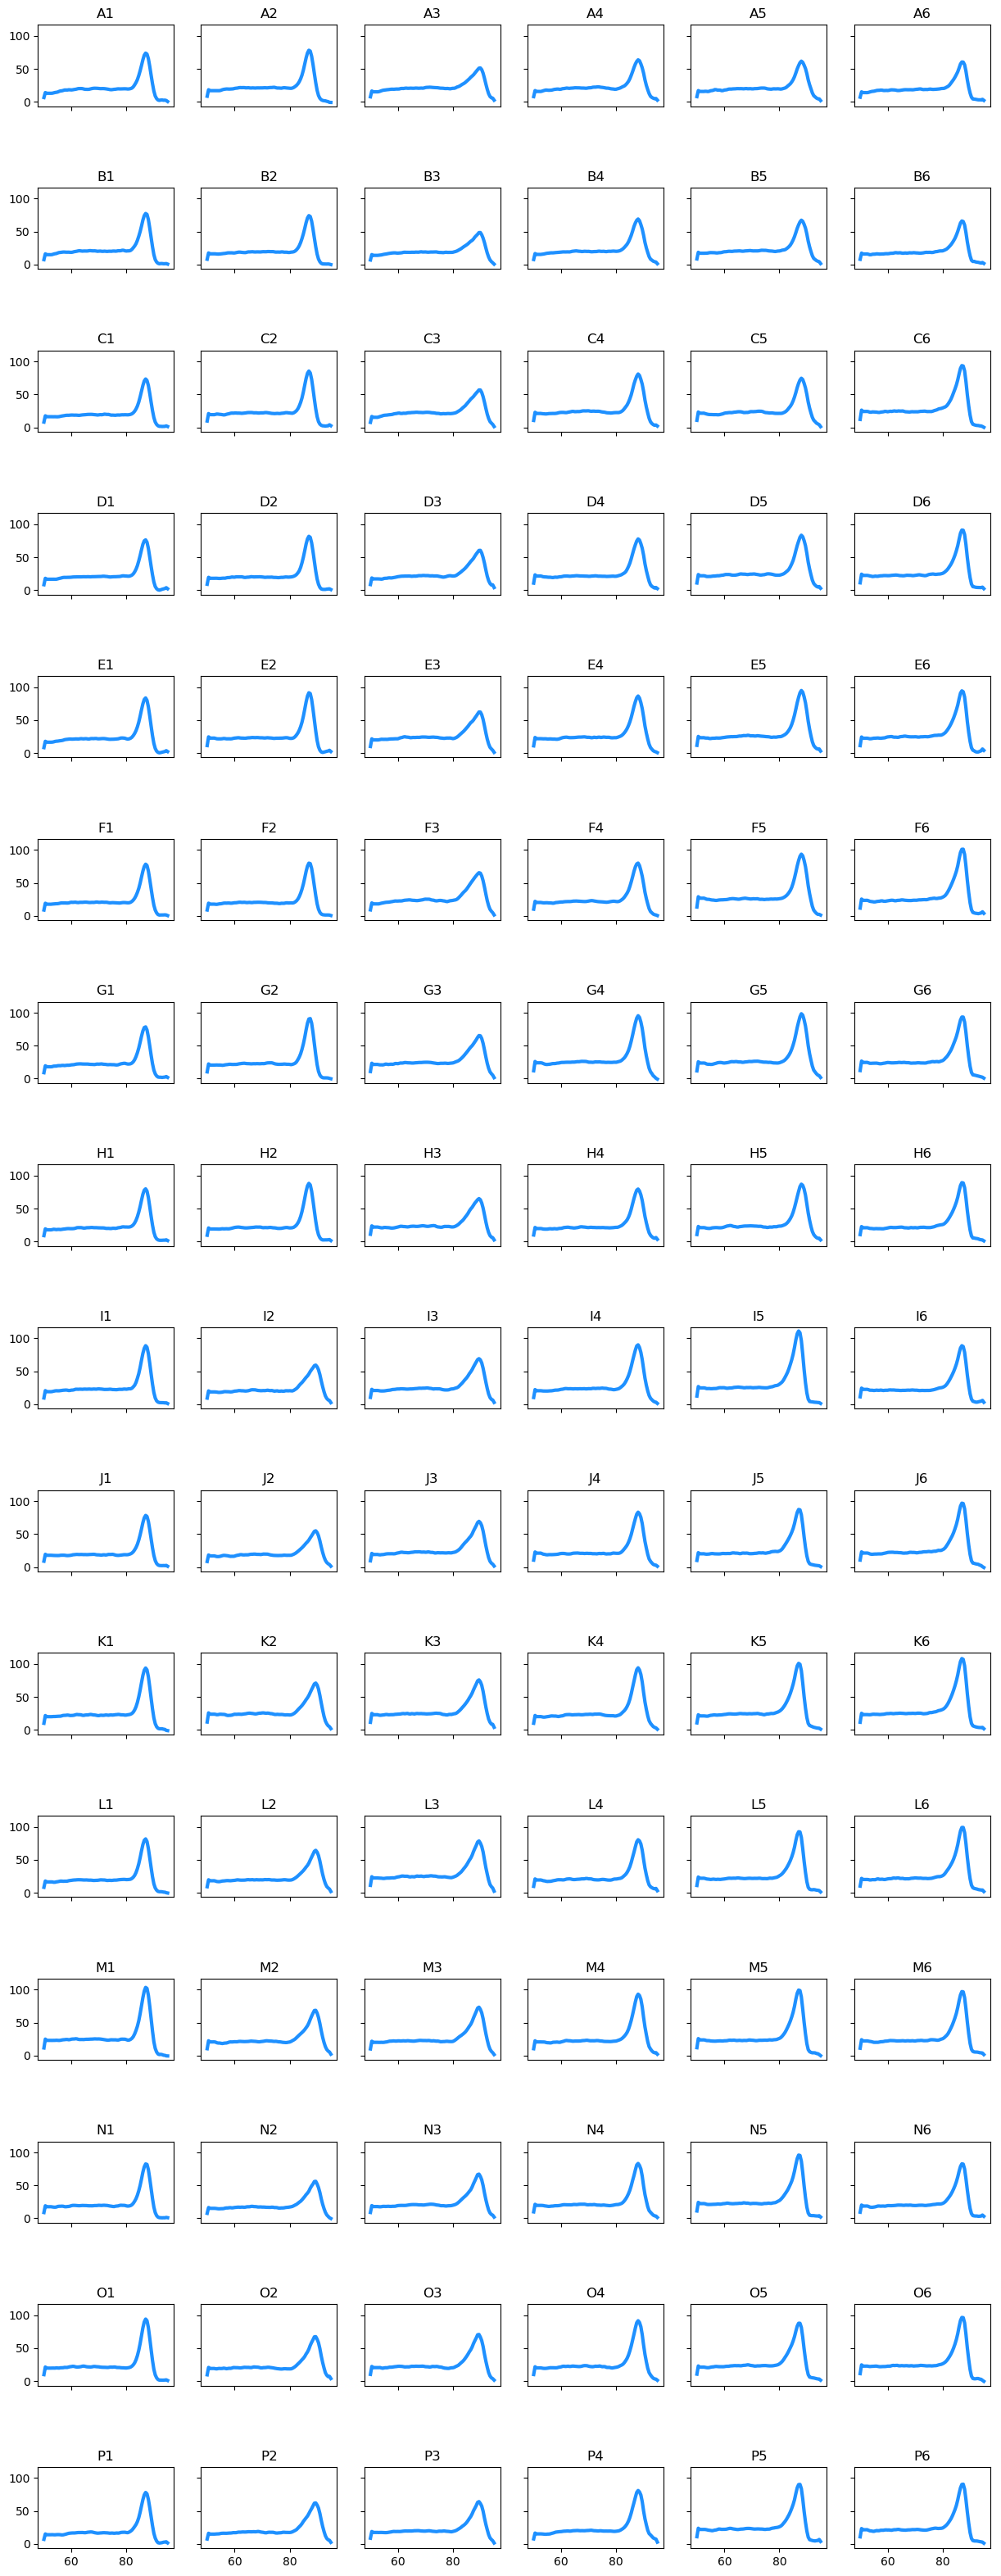

In [4]:
melt_analysis = Analysis(File_Path + Melt_file, plate_size= "custom", quad= None, 
             letters= "ABCDEFGHIJKLMNOP", numbers = 6, failed_wells= [])
melt_analysis.plot_melt_curve()


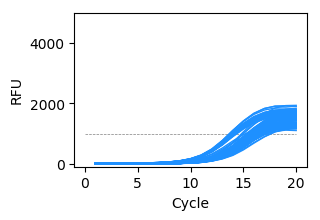

In [5]:
quant_analysis = Analysis(File_Path + Quant_file, plate_size='custom', quad= None, 
             letters= "ABCDEFGHIJKLMNOP", numbers = 6, failed_wells=[])
quant_analysis.plot_quant_curves()

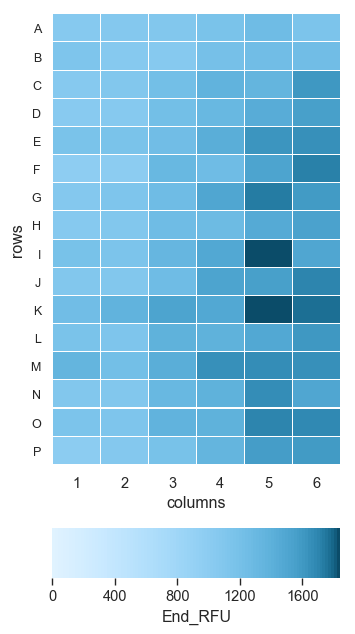

In [6]:
end_analysis = Analysis(File_Path + End_file, plate_size='custom', quad= None, 
             letters= "ABCDEFGHIJKLMNOP", numbers = 6, failed_wells=[])
end_analysis.plot_end_RFU()

### The Pooling Calculator can be used to make the pooling file
#### In the following example, I set "failed_wells" = ["A1","A2"] to show how to remove wells with low fluorescence from the pooling calculator. It is important to remove wells with low fluorescence from the pooling calculation because it can negatively impact the results.

In [7]:
Pooling = Pooling_Calculator(file = File_Path+End_file, plate_size='custom', quad= None, 
             letters= "ABCDEFGHIJKLMNOP", numbers = 6, failed_wells=["A1","A2"])
Pooling_file =Pooling.make_pooling_file()
Pooling_file

failed wells: 
 ['A1', 'A2']


,End RFU,Source Well,rows,columns,Transfer Volume,Destination Well
0,1089.535864,A3,A,3,1817.0,A1
1,1165.425084,A4,A,4,1699.0,A1
2,1260.090425,A5,A,5,1571.0,A1
3,1150.773768,A6,A,6,1720.0,A1
4,1125.009859,B1,B,1,1760.0,A1
5,1066.417862,B2,B,2,1856.0,A1
6,1056.700824,B3,B,3,1873.0,A1
7,1214.469198,B4,B,4,1630.0,A1
8,1249.812492,B5,B,5,1584.0,A2
9,1246.284254,B6,B,6,1588.0,A2


### For a sanity check, plot the transfer volumes in a heatmap

failed wells: 
 ['A1', 'A2']


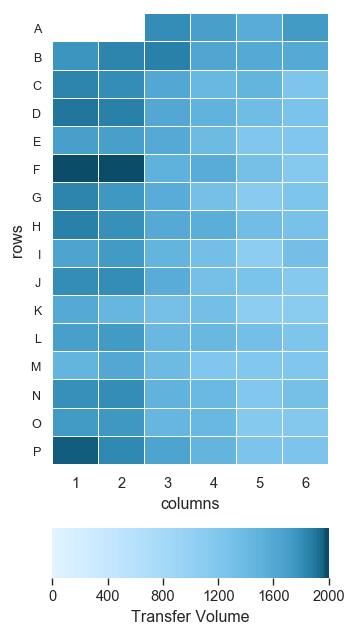

In [8]:
Pooling.plot_transfer_volumes()

### Finally, save the pooling file to a .csv

In [9]:
Pooling_file.to_csv(Pooling_output_file)